<a href="https://colab.research.google.com/github/Andres21-ctrl/Data-Analyst-Portafolio/blob/main/Football_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# Importando las bibliotecas necesarias
from google.colab import files # Importando el módulo de archivos de Google Colab para cargar datos
uploaded = files.upload()

Saving matches.csv to matches (1).csv


In [72]:
# Importamos todas las bibliotecas necesarias para nuestro analisis predictorio
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
pd.options.display.max_rows = 200

In [75]:
# Importando el módulo io para operaciones de entrada y salida
import io

In [78]:
# Leyendo los datos de los partidos desde el archivo CSV con índice
matches = pd.read_csv("matches.csv", index_col=0)

In [80]:
# Hacemos un poco de analisis exploratorio mostrando las primeras filas del DataFrame de partidos
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [81]:
# Verificando la forma (filas, columnas) del DataFrame de partidos
matches.shape

(1389, 27)

In [82]:
# Calculando el número total de partidos para ver si el numero de filas coincide con el numero esperado
38 * 20 *2

1520

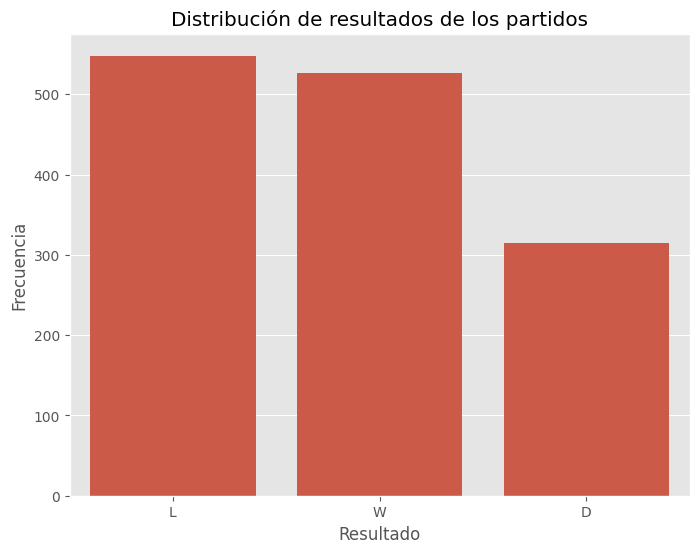

In [113]:
# Exploración inicial de datos
# Histograma de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=matches)
plt.title('Distribución de resultados de los partidos')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

In [83]:
# Contando el número de partidos jugados por cada equipo
matches["team"].value_counts()

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [84]:
# Contando el número de partidos en cada ronda
matches["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [85]:
# Mostrando los tipos de datos de las columnas en el DataFrame de partidos
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [86]:
# Convirtiendo la columna 'date' al formato datetime
matches["date"] = pd.to_datetime(matches["date"])

In [87]:
# Codificando características categóricas 'venue' y 'opponent' a valores numéricos
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [88]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [89]:
# Extrayendo la hora de la columna 'time'
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [90]:
# Extrayendo el día de la semana de la columna 'date'
matches["day_code"] = matches["date"].dt.dayofweek

In [91]:
# Creando una variable objetivo binaria basada en el resultado del partido
matches["target"] = (matches["result"] == "W").astype("int")

In [ ]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,1.0,0.0,0.0,2022,Manchester City,0,18,16,6,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,1.0,0.0,0.0,2022,Manchester City,1,15,15,5,1
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,0.0,0.0,0.0,2022,Manchester City,1,0,12,5,1
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,0.0,0.0,0.0,2022,Manchester City,0,10,15,5,1
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,1.0,0.0,0.0,2022,Manchester City,1,17,15,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,...,0.0,0.0,0.0,2021,Sheffield United,0,18,19,6,0
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,...,1.0,0.0,0.0,2021,Sheffield United,1,6,15,5,0
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,...,0.0,0.0,0.0,2021,Sheffield United,0,7,19,6,1
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0.0,1.0,Newcastle Utd,...,1.0,0.0,0.0,2021,Sheffield United,0,14,18,2,0


In [92]:
# Importando RandomForestClassifier de scikit-learn
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Inicializando RandomForestClassifier con parámetros especificados
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [94]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba según la fecha

In [ ]:
train = matches[matches["date"] < '2022-01-01']

In [ ]:
test = matches[matches["date"] > '2022-01-01']

In [95]:
# Seleccionando variables predictoras para el modelo
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [96]:
# Ajustando el modelo RandomForestClassifier a los datos de entrenamiento
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [97]:
# Realizando predicciones sobre los datos de prueba
preds = rf.predict(test[predictors])

In [98]:
# Importando la métrica accuracy_score de scikit-learn
from sklearn.metrics import accuracy_score

In [99]:
# Calculando la precisión del modelo
error = accuracy_score(test["target"], preds)

In [100]:
# Mostrando la precisión del modelo
error

0.6123188405797102

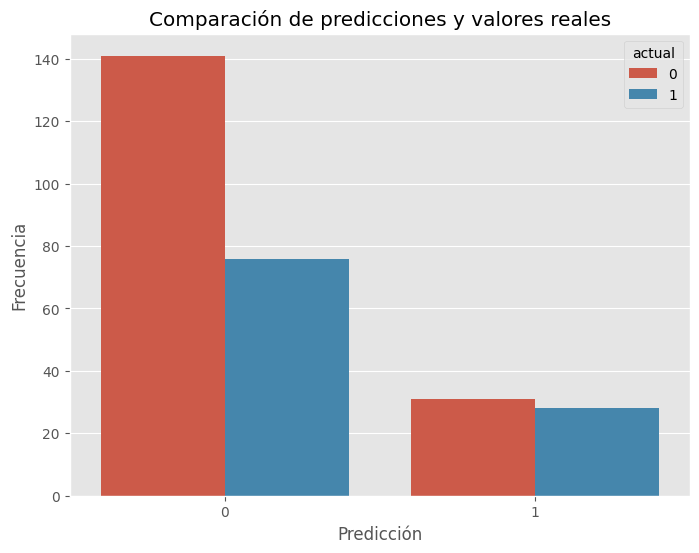

In [114]:
# Validación del modelo
# Gráfico de barras de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted', hue='actual', data=combined)
plt.title('Comparación de predicciones y valores reales')
plt.xlabel('Predicción')
plt.ylabel('Frecuencia')
plt.show()

In [101]:
# Creando un DataFrame para comparar los valores reales y predichos
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [102]:
# Creando una tabla cruzada de valores reales vs predichos
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,141,31
1,76,28


In [104]:
# Importando la métrica precision_score de scikit-learn y calculando el porcentaje de precision del modelo
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.4745762711864407

In [105]:
# Agrupando los datos de partidos por equipo
grouped_matches = matches.groupby("team")

In [106]:
# Extrayendo los datos de partidos para Manchester City y ordenándolos por fecha
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [107]:
# Definiendo una función para calcular promedios móviles para columnas seleccionadas
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [103]:
# Columnas y nuevas columnas para calcular promedios móviles
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
5,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5,1,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,5,0,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Premier League,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,...,5,1,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,...,6,0,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Premier League,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,...,5,0,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
14,2020-11-28,15:00,Premier League,Matchweek 10,Sat,Home,W,5.0,0.0,Burnley,...,5,1,0.666667,1.000000,14.333333,5.000000,17.800000,0.666667,0.000000,0.333333
16,2020-12-05,15:00,Premier League,Matchweek 11,Sat,Home,W,2.0,0.0,Fulham,...,5,1,2.000000,1.000000,15.333333,4.666667,16.966667,0.000000,0.000000,0.333333
18,2020-12-12,17:30,Premier League,Matchweek 12,Sat,Away,D,0.0,0.0,Manchester Utd,...,5,0,2.333333,0.666667,18.333333,5.666667,15.800000,0.000000,0.333333,0.333333
19,2020-12-15,20:00,Premier League,Matchweek 13,Tue,Home,D,1.0,1.0,West Brom,...,1,0,2.333333,0.000000,14.333333,4.666667,16.400000,0.333333,0.333333,0.333333
20,2020-12-19,15:00,Premier League,Matchweek 14,Sat,Away,W,1.0,0.0,Southampton,...,5,1,1.000000,0.333333,16.666667,4.666667,16.666667,1.000000,0.333333,0.333333


In [108]:
# Aplicando la función rolling_averages a los datos de partidos de cada equipo
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [51]:
matches_rolling

date   time            comp         round  \
team                                                                         
Arsenal                 6  2020-10-04  14:00  Premier League   Matchweek 4   
                        7  2020-10-17  17:30  Premier League   Matchweek 5   
                        9  2020-10-25  19:15  Premier League   Matchweek 6   
                        11 2020-11-01  16:30  Premier League   Matchweek 7   
                        13 2020-11-08  19:15  Premier League   Matchweek 8   
...                               ...    ...             ...           ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Premier League  Matchweek 29   
                        33 2022-03-18  20:00  Premier League  Matchweek 30   
                        34 2022-04-02  15:00  Premier League  Matchweek 31   
                        35 2022-04-08  20:00  Premier League  Matchweek 32   
                        36 2022-04-24  14:00  Premier League  Matchweek 34   

                            day venue result   gf   ga         opponent  ...  \
team                                                                     ...   
Arsenal                 6   Sun  Home      W  2.0  1.0    Sheffield Utd  ...   
                        7   Sat  Away      L  0.0  1.0  Manchester City  ...   
                        9   Sun  Home      L  0.0  1.0   Leicester City  ...   
                        11  Sun  Away      W  1.0  0.0   Manchester Utd  ...   
                        13  Sun  Home      L  0.0  3.0      Aston Villa  ...   
...                         ...   ...    ...  ...  ...              ...  ...   
Wolverhampton Wanderers 32  Sun  Away      W  1.0  0.0          Everton  ...   
                        33  Fri  Home      L  2.0  3.0     Leeds United  ...   
                        34  Sat  Home      W  2.0  1.0      Aston Villa  ...   
                        35  Fri  Away      L  0.0  1.0    Newcastle Utd  ...   
                        36  Sun  Away      L  0.0  1.0          Burnley  ...   

                            day_code  target  gf_rolling  ga_rolling  \
team                                                                   
Arsenal                 6          6       1    2.000000    1.333333   
                        7          5       0    1.666667    1.666667   
                        9          6       0    1.000000    1.666667   
                        11         6       1    0.666667    1.000000   
                        13         6       0    0.333333    0.666667   
...                              ...     ...         ...         ...   
Wolverhampton Wanderers 32         6       1    1.333333    1.000000   
                        33         4       0    1.666667    0.666667   
                        34         5       1    2.333333    1.000000   
                        35         4       0    1.666667    1.333333   
                        36         6       0    1.333333    1.666667   

                           sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                        
Arsenal                 6    7.666667    3.666667    14.733333   0.666667   
                        7    5.333333    3.666667    15.766667   0.000000   
                        9    7.000000    3.666667    16.733333   0.666667   
                        11   9.666667    4.000000    16.033333   1.000000   
                        13   9.666667    2.666667    18.033333   1.000000   
...                               ...         ...          ...        ...   
Wolverhampton Wanderers 32  12.333333    3.666667    19.300000   0.000000   
                        33  12.333333    4.333333    19.600000   0.000000   
                        34  13.000000    5.333333    19.833333   0.000000   
                        35  13.000000    5.000000    18.533333   0.000000   
                        36  10.000000    4.666667    17.633333   0.000000   

                            pk_rolling

In [52]:
# Eliminando el nivel 'team' del índice
matches_rolling = matches_rolling.droplevel('team')

In [53]:
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,day_code,target,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
6,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,...,6,1,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,...,5,0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Premier League,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,...,6,0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Premier League,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,...,6,1,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Premier League,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,...,6,0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Premier League,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,...,6,1,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Premier League,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,...,4,0,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Premier League,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,...,5,1,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000
35,2022-04-08,20:00,Premier League,Matchweek 32,Fri,Away,L,0.0,1.0,Newcastle Utd,...,4,0,1.666667,1.333333,13.000000,5.000000,18.533333,0.000000,0.000000,0.000000


In [109]:
# Restableciendo el índice del DataFrame
matches_rolling.index = range(matches_rolling.shape[0])

In [110]:
# Función para hacer predicciones usando el modelo RandomForestClassifier
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [56]:
# Haciendo predicciones sobre los datos de promedios móviles
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [57]:
# Mostrando el margen de precisión
error

0.625

In [58]:
# Mostrando el DataFrame combinado de valores reales y predichos
combined

,actual,predicted
55,0,0
56,1,0
57,1,0
58,1,1
59,1,1
...,...,...
1312,1,0
1313,0,0
1314,1,0
1315,0,0


In [59]:
# Fusionando el DataFrame combinado con los datos de promedios móviles para agregar información adicional
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [60]:
# Mostrando las primeras filas del DataFrame ya fusionado
combined.head()

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W


In [111]:
# Definiendo un diccionario personalizado para manejar valores faltantes en el mapeo
class MissingDict(dict):
    __missing__ = lambda self, key: key
# Mapeando nombres de equipos a nombres estandarizados
map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves"}
mapping = MissingDict(**map_values)

In [62]:
# Mapeando los nombres de los equipos usando un diccionario personalizado
combined["new_team"] = combined["team"].map(mapping)

In [67]:
# Probamos el mapeo con el equipo Manchester United
mapping['Manchester Utd']

'Manchester Utd'

In [68]:
# Fusionando el DataFrame combinado consigo mismo basado en la fecha y el nuevo nombre del equipo
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [69]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [112]:
# Filtrando el DataFrame fusionado para casos donde el modelo predijo una victoria y el oponente no ganó
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

1    27
0    13
Name: actual_x, dtype: int64

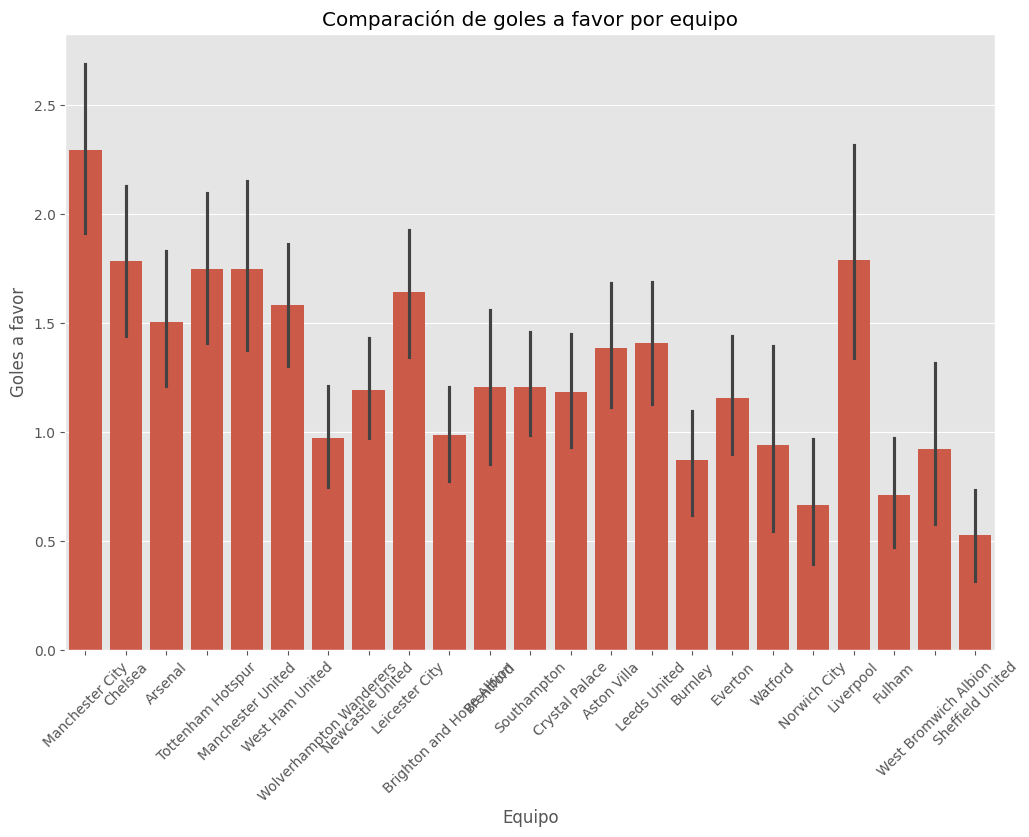

In [115]:
# Visualización de comparaciones entre equipos
# Gráfico de barras de goles a favor por equipo
plt.figure(figsize=(12, 8))
sns.barplot(x='team', y='gf', data=matches)
plt.title('Comparación de goles a favor por equipo')
plt.xlabel('Equipo')
plt.ylabel('Goles a favor')
plt.xticks(rotation=45)
plt.show()